In [1]:
import LinearRegression as LR
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sb

In [2]:
df = pd.read_csv('AirQualityUCI.csv')
df.drop(['un1','un2','AH'],axis=1,inplace=True)
df.replace('', np.nan,inplace=True)
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Date'] = df['Date'].dt.month
df['Time'] = df['Time'].dt.hour
df = df.drop_duplicates()


C:\Users\dp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-03-2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\dp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-03-2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\dp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-03-2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\dp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-03-2004' in DD/MM/YYYY format. Provide format or specify infer_date

In [3]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,10,18,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9
1,10,19,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7
2,10,20,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0
3,10,21,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0
4,10,22,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4,10,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3
9353,4,11,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7
9354,4,12,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3
9355,4,13,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5


                   Date      Time    CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
Date           1.000000  0.001584 -0.044502    -0.101230 -0.148170 -0.089438   
Time           0.001584  1.000000  0.075984     0.196780  0.049371  0.046087   
CO(GT)        -0.044502  0.075984  1.000000     0.041411  0.128351 -0.031378   
PT08.S1(CO)   -0.101230  0.196780  0.041411     1.000000  0.170007  0.852687   
NMHC(GT)      -0.148170  0.049371  0.128351     0.170007  1.000000  0.037323   
C6H6(GT)      -0.089438  0.046087 -0.031378     0.852687  0.037323  1.000000   
PT08.S2(NMHC) -0.016029  0.282315  0.029926     0.933102  0.110104  0.767433   
NOx(GT)        0.042847  0.225153  0.526451     0.277993 -0.004427 -0.001174   
PT08.S3(NOx)  -0.088615 -0.256172 -0.089981     0.087019  0.048821  0.512193   
NO2(GT)       -0.087218  0.219483  0.671127     0.154030  0.103307 -0.010992   
PT08.S4(NO2)  -0.022001  0.147978 -0.073724     0.845149  0.162680  0.774673   
PT08.S5(O3)   -0.021557  0.198014  0.080

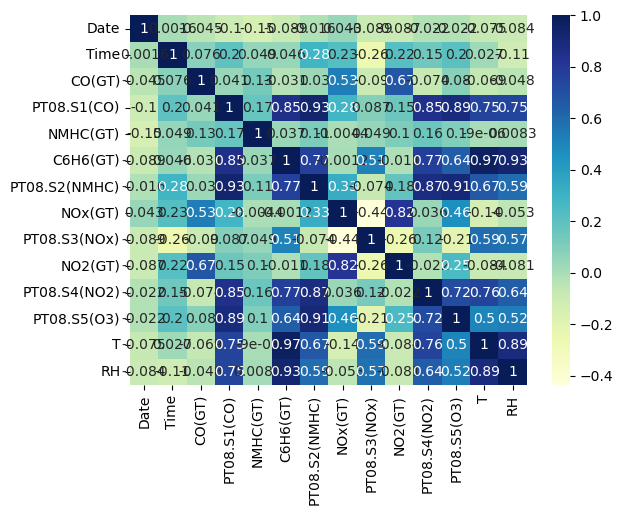

In [5]:
print(df.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [6]:
arr = df.to_numpy()

X = arr[:, 0:13]
Y = arr[:,13]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42,train_size=0.9)


In [7]:
print(LR.fitNormal(X_train,Y_train))
#print(LR.fitGD(X_train,Y_train,0.1,0,1,5,theta_in))
Y_train=np.array((Y_train-Y_train.mean())/Y.std())
X_train=pd.DataFrame(X_train)
X_train=X_train.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
print(LR.run_gradient_descent(X_train,Y_train,0.01,1000))


[ 0.80585056 -0.12144562  0.00294857  0.08594497 -0.04114229  2.19146891
 -0.1443332   0.00614097  0.01654458 -0.01423137  0.04181557  0.00353559
 -1.14189139]
Final Estimate of theta :  [ 9.83782433e-10  1.27341679e-02 -1.02780216e-01  2.12662045e-02
  4.85554297e-01 -5.00653676e-02  6.21043142e-01 -2.27828151e-01
  8.33886797e-02  1.77716786e-01 -1.13357482e-01 -7.26767687e-02
 -1.40928088e-02  3.87337872e-02]
(     iteration       cost
0          0.0  10.478606
10        10.0   2.627794
20        20.0   1.117279
30        30.0   0.671839
40        40.0   0.479989
..         ...        ...
950      950.0   0.096256
960      960.0   0.095923
970      970.0   0.095594
980      980.0   0.095269
990      990.0   0.094949

[100 rows x 2 columns], array([ 9.83782433e-10,  1.27341679e-02, -1.02780216e-01,  2.12662045e-02,
        4.85554297e-01, -5.00653676e-02,  6.21043142e-01, -2.27828151e-01,
        8.33886797e-02,  1.77716786e-01, -1.13357482e-01, -7.26767687e-02,
       -1.40928088e-0

Final Estimate of theta :  [ 1.49565275e-09  1.33957134e-02 -8.49602917e-02  1.46394273e-02
  3.10915877e-01 -3.30569155e-02  8.61296775e-01 -3.85676878e-01
  5.70707083e-02  1.08634628e-01 -8.49480143e-02 -1.70472319e-02
  1.13062754e-01 -2.04272061e-02]


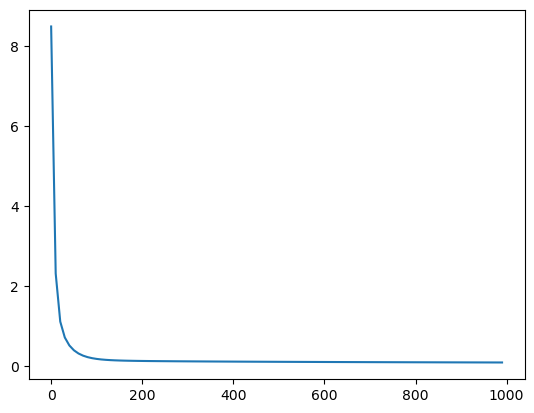

In [8]:
cost,theta=LR.run_gradient_descent(X_train,Y_train,0.01,1000)
plt.plot(cost['iteration'],cost['cost'])